# Optimization and Deep Learning

In this section, we will discuss the relationship between optimization and deep learning as well as the challenges of using optimization in deep learning. For a deep learning problem, we will usually define a loss function first. Once we have the loss function, we can use an optimization algorithm in attempt to minimize the loss. In optimization, a loss function is often referred to as the objective function of the optimization problem. Traditionally, optimization algorithms usually only consider minimizing the objective function. In fact, any maximization problem can be easily transformed into a minimization problem: we just need to use the opposite of the objective function as the new objective function.

## The Relationship Between Optimization and Deep Learning

Although optimization provides a way to minimize the loss function for deep learning, in essence, the goals of optimization and deep learning are different.
In the ["Model Selection, Underfitting and Overfitting"](../chapter_deep-learning-basics/underfit-overfit.md) section, we discussed the difference between the training error and generalization error.
Because the objective function of the optimization algorithm is usually a loss function based on the training data set, the goal of optimization is to reduce the training error.
However, the goal of deep learning is to reduce the generalization error.
In order to reduce the generalization error, we need to pay attention to overfitting in addition to using the optimization algorithm to reduce the training error.

In this chapter, we are going to focus specifically on the performance of the optimization algorithm in minimizing the objective function, rather than the model's generalization error.


## Optimization Challenges in Deep Learning

In the [Linear Regression](../chapter_deep-learning-basics/linear-regression.md) section, we differentiated between analytical solutions and numerical solutions in optimization problems. In deep learning, most objective functions are complicated. Therefore, many optimization problems do not have analytical solutions. Instead, we must use optimization algorithms based on the numerical method to find approximate solutions, which also known as numerical solutions. The optimization algorithms discussed here are all numerical method-based algorithms. In order to minimize the numerical solution of the objective function, we will reduce the value of the loss function as much as possible by using optimization algorithms to finitely update the model parameters.

There are many challenges in deep learning optimization. Two such challenges are discussed below: local minimums and saddle points. To better describe the problem, we first import the packages or modules required for the experiments in this section.

In [1]:
%matplotlib inline
import gluonbook as gb
from mpl_toolkits import mplot3d
import numpy as np

### Local Minimums

For the objective function $f(x)$, if the value of $f(x)$ at $x$ is smaller than the values of $f(x)$ at any other points in the vicinity of $x$, then $f(x)$ could be a local minimum. If the value of $f(x)$ at $x$ is the minimum of the objective function over the entire domain, then $f(x)$ is the global minimum.

For example, given the function

$$f(x) = x \cdot \text{cos}(\pi x), \qquad -1.0 \leq x \leq 2.0,$$

we can approximate the local minimum and global minimum of this function. Please note that the arrows in the figure only indicate the approximate positions.

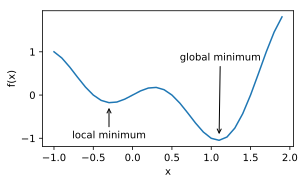

In [2]:
def f(x):
    return x * np.cos(np.pi * x)

gb.set_figsize((4.5, 2.5))
x = np.arange(-1.0, 2.0, 0.1)
fig,  = gb.plt.plot(x, f(x))
fig.axes.annotate('local minimum', xy=(-0.3, -0.25), xytext=(-0.77, -1.0),
                  arrowprops=dict(arrowstyle='->'))
fig.axes.annotate('global minimum', xy=(1.1, -0.95), xytext=(0.6, 0.8),
                  arrowprops=dict(arrowstyle='->'))
gb.plt.xlabel('x')
gb.plt.ylabel('f(x)');

The objective function of the deep learning model may have several local optimums. When the numerical solution of an optimization problem is near the local optimum, the numerical solution obtained by the final iteration may only minimize the objective function locally, rather than globally, as the gradient of the objective function's solutions approaches or becomes zero.

### Saddle Points

As we just mentioned, one possible explanation for a gradient that approaches or becomes zero is that the current solution is close to a local optimum. In fact, there is another possibility. The current solution could be near a saddle point. For example, given the function

$$f(x) = x^3,$$

we can find the position of the saddle point of this function.

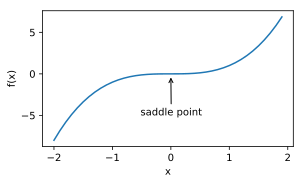

In [3]:
x = np.arange(-2.0, 2.0, 0.1)
fig, = gb.plt.plot(x, x**3)
fig.axes.annotate('saddle point', xy=(0, -0.2), xytext=(-0.52, -5.0),
                  arrowprops=dict(arrowstyle='->'))
gb.plt.xlabel('x')
gb.plt.ylabel('f(x)');

Now, we will use another example of a two-dimensional function, defined as follows:

$$f(x, y) = x^2 - y^2.$$

We can find the position of the saddle point of this function. Perhaps you have noticed that the function looks just like a saddle, and the saddle point happens to be the center point of the seat.

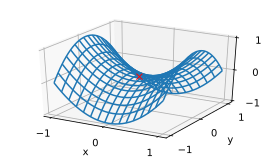

In [4]:
x, y = np.mgrid[-1: 1: 31j, -1: 1: 31j]
z = x**2 - y**2

ax = gb.plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, **{'rstride': 2, 'cstride': 2})
ax.plot([0], [0], [0], 'rx')
ticks = [-1,  0, 1]
gb.plt.xticks(ticks)
gb.plt.yticks(ticks)
ax.set_zticks(ticks)
gb.plt.xlabel('x')
gb.plt.ylabel('y');

In the figure above, the objective function's local minimum and local maximum can be found on the $x$ axis and $y$ axis respectively at the position of the saddle point.

We assume that the input of a function is a $k$-dimensional vector and its output is a scalar, so its Hessian matrix will have $k$ eigenvalues (see the ["Mathematical Foundation"](../chapter_appendix/math.md) section). The solution of the function could be a local minimum, a local maximum, or a saddle point at a position where the function gradient is zero:

* When the eigenvalues of the function's Hessian matrix at the zero-gradient position are all positive, we have a local minimum for the function.
* When the eigenvalues of the function's Hessian matrix at the zero-gradient position are all negative, we have a local maximum for the function.
* When the eigenvalues of the function's Hessian matrix at the zero-gradient position are negative and positive, we have a saddle point for the function.

The random matrix theory tells us that, for a large Gaussian random matrix, the probability for any eigenvalue to be positive or negative is 0.5[1]. Thus, the probability of the first case above is $0.5^k$. Since, generally, the parameters of deep learning models are high-dimensional ($k$ is large), saddle points in the objective function are more commonly seen than local minimums.

In deep learning, it is difficult, but also not necessary, to find the global optimal solution of the objective function. In the subsequent sections of this chapter, we will introduce the optimization algorithms commonly used in deep learning one by one. These algorithms have trained some very effective deep learning models that have tackled practical problems.


## Summary

* Because the objective function of the optimization algorithm is usually a loss function based on the training data set, the goal of optimization is to reduce the training error.
* Since, generally, the parameters of deep learning models are high-dimensional, saddle points in the objective function are more commonly seen than local minimums.


## Problems

* What other challenges involved in deep learning optimization can you think of?




## Reference

[1] Wigner, E. P. (1958). On the distribution of the roots of certain symmetric matrices. Annals of Mathematics, 325-327.

## Discuss on our Forum

<div id="discuss" topic_id="2371"></div>